In [1]:
# import numpy as np
# np.version.version
!pip install numpy==1.19

  Using cached numpy-1.19.0.zip (7.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [66 lines of output]
  Running from numpy source directory.
  <string>:460: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
  C:\Users\steve\AppData\Local\Temp\pip-install-x2_n1cjw\numpy_45ba4666804b4456a1f368ef5cc07cec\tools\cythonize.py:73: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    required_version = LooseVersion('0.29.14')
  C:\Users\steve\AppData\Local\Temp\pip-install-x2_n1cjw\numpy_45ba4666804b4456a1f368ef5cc07cec\tools\cythonize.py:75: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    if LooseVersion(cython_version) < required_version:
  
  Error compiling Cython file:
  ------------------------------------------------------------
  ...
          for i in range(1, RK_STATE_LEN):
              

In [2]:
# https://www.kaggle.com/datasets/guillemservera/grains-and-cereals-futures
import pandas as pd
import numpy as np
grains_df = pd.read_csv('all_grains_data.csv')
grains_df

,ticker,commodity,date,open,high,low,close,volume
0,ZC=F,Corn,2000-07-17,182.25,182.25,178.25,179.25,19385
1,ZC=F,Corn,2000-07-18,179.00,183.25,179.00,180.75,25205
2,ZC=F,Corn,2000-07-19,180.00,182.75,178.75,182.00,17126
3,ZC=F,Corn,2000-07-20,181.50,187.00,181.00,186.00,18742
4,ZC=F,Corn,2000-07-21,185.50,188.00,185.00,187.75,16814
...,...,...,...,...,...,...,...,...
34860,ZS=F,Soybean,2023-09-06,1365.50,1365.50,1359.50,1360.25,102
34861,ZS=F,Soybean,2023-09-07,1349.50,1350.00,1345.00,1345.00,310
34862,ZS=F,Soybean,2023-09-08,1339.00,1349.50,1339.00,1349.50,198
34863,ZS=F,Soybean,2023-09-11,1352.50,1352.50,1352.00,1352.50,36


In [3]:
grains_df['commodity'].unique()

array(['Corn', 'Oat', 'KC HRW Wheat', 'Rough Rice', 'Soybean Oil',
       'Soybean'], dtype=object)

In [4]:
corn_df = pd.read_csv('individual_data/Corn_data.csv')
corn_df

,date,open,high,low,close,volume
0,2000-07-17,182.25,182.25,178.25,179.25,19385
1,2000-07-18,179.00,183.25,179.00,180.75,25205
2,2000-07-19,180.00,182.75,178.75,182.00,17126
3,2000-07-20,181.50,187.00,181.00,186.00,18742
4,2000-07-21,185.50,188.00,185.00,187.75,16814
...,...,...,...,...,...,...
5786,2023-09-06,473.50,476.25,471.25,471.50,841
5787,2023-09-07,471.25,474.00,468.50,470.75,741
5788,2023-09-08,471.25,472.25,467.00,468.50,233
5789,2023-09-11,470.25,471.50,468.00,471.25,430


In [5]:
corn_dict = {}
window_size = 7
for i in range(window_size):
    corn_dict['price_'+str(7-i)+'_days_ago'] = corn_df['close'][i:-7+i].reset_index(drop=True) 
corn_dict    

{'price_7_days_ago': 0       179.25
 1       180.75
 2       182.00
 3       186.00
 4       187.75
          ...  
 5779    470.75
 5780    478.50
 5781    469.50
 5782    461.75
 5783    461.00
 Name: close, Length: 5784, dtype: float64,
 'price_6_days_ago': 0       180.75
 1       182.00
 2       186.00
 3       187.75
 4       184.50
          ...  
 5779    478.50
 5780    469.50
 5781    461.75
 5782    461.00
 5783    464.75
 Name: close, Length: 5784, dtype: float64,
 'price_5_days_ago': 0       182.00
 1       186.00
 2       187.75
 3       184.50
 4       182.75
          ...  
 5779    469.50
 5780    461.75
 5781    461.00
 5782    464.75
 5783    471.00
 Name: close, Length: 5784, dtype: float64,
 'price_4_days_ago': 0       186.00
 1       187.75
 2       184.50
 3       182.75
 4       180.50
          ...  
 5779    461.75
 5780    461.00
 5781    464.75
 5782    471.00
 5783    471.50
 Name: close, Length: 5784, dtype: float64,
 'price_3_days_ago': 0       187.75
 1  

In [6]:
X = pd.DataFrame.from_dict(corn_dict)
X

,price_7_days_ago,price_6_days_ago,price_5_days_ago,price_4_days_ago,price_3_days_ago,price_2_days_ago,price_1_days_ago
0,179.25,180.75,182.00,186.00,187.75,184.50,182.75
1,180.75,182.00,186.00,187.75,184.50,182.75,180.50
2,182.00,186.00,187.75,184.50,182.75,180.50,181.00
3,186.00,187.75,184.50,182.75,180.50,181.00,180.25
4,187.75,184.50,182.75,180.50,181.00,180.25,180.25
...,...,...,...,...,...,...,...
5779,470.75,478.50,469.50,461.75,461.00,464.75,471.00
5780,478.50,469.50,461.75,461.00,464.75,471.00,471.50
5781,469.50,461.75,461.00,464.75,471.00,471.50,470.75
5782,461.75,461.00,464.75,471.00,471.50,470.75,468.50


In [7]:
y = corn_df['close'][7:].reset_index(drop=True) 
y

0       180.50
1       181.00
2       180.25
3       180.25
4       179.75
         ...  
5779    471.50
5780    470.75
5781    468.50
5782    471.25
5783    476.75
Name: close, Length: 5784, dtype: float64

In [8]:
train_pct = .9
X_train = X[:int(len(X)*train_pct)]
X_test = X[int(len(X)*train_pct):]
y_train = y[:int(len(y)*train_pct)]
y_test = y[int(len(y)*train_pct):]

In [9]:
from sklearn.linear_model import LinearRegression
  
classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [10]:
print (classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))
# very high coefficient of determination on the train set, lower on the test set

0.9971498308553326
0.971229819095482


In [11]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(train_mse, test_mse)
# mse considerably higher on test set than train set
# higher in general than I would have thought. maybe I should compare these scores to a simple naive prediction using 
# the previous value.

65.14954633823858 193.58699139121558


In [12]:
y_train_pred

array([183.1865224 , 180.69614961, 181.4084901 , ..., 656.58183816,
       664.93181076, 658.73352565])

In [13]:
y_train

0       180.50
1       181.00
2       180.25
3       180.25
4       179.75
         ...  
5200    658.25
5201    658.25
5202    664.50
5203    659.50
5204    657.25
Name: close, Length: 5205, dtype: float64

In [14]:
X_train = X_train.to_numpy()

In [15]:
X_train

array([[179.25, 180.75, 182.  , ..., 187.75, 184.5 , 182.75],
       [180.75, 182.  , 186.  , ..., 184.5 , 182.75, 180.5 ],
       [182.  , 186.  , 187.75, ..., 182.75, 180.5 , 181.  ],
       ...,
       [759.5 , 757.5 , 719.  , ..., 652.5 , 658.25, 658.25],
       [757.5 , 719.  , 685.  , ..., 658.25, 658.25, 664.5 ],
       [719.  , 685.  , 652.5 , ..., 658.25, 664.5 , 659.5 ]])

In [16]:
X_test = X_test.to_numpy()


In [17]:
# Build the Model
import tensorflow as tf
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Print the model summary
model_tune.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 7, 1)              0         
                                                                 
 bidirectional (Bidirectiona  (None, 7, 64)            8704      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 lambda_1 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 33,601
Trainable params: 33,601
Non-traina

In [18]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-12 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0)

# Set the training parameters
model_tune.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=optimizer)
#tf.keras.losses.Huber()
# Train the model
history = model_tune.fit(X_train, y_train, epochs=160, callbacks=[lr_schedule])

Epoch 1/160
163/163 [==============================] - 7s 8ms/step - loss: 165976.8438 - lr: 1.0000e-12
Epoch 2/160
163/163 [==============================] - 1s 8ms/step - loss: 165858.1875 - lr: 1.1220e-12
Epoch 3/160
163/163 [==============================] - 1s 8ms/step - loss: 165730.7812 - lr: 1.2589e-12
Epoch 4/160
163/163 [==============================] - 1s 8ms/step - loss: 165594.7969 - lr: 1.4125e-12
Epoch 5/160
163/163 [==============================] - 1s 8ms/step - loss: 165450.2344 - lr: 1.5849e-12
Epoch 6/160
163/163 [==============================] - 1s 8ms/step - loss: 165297.1406 - lr: 1.7783e-12
Epoch 7/160
163/163 [==============================] - 1s 8ms/step - loss: 165135.4219 - lr: 1.9953e-12
Epoch 8/160
163/163 [==============================] - 1s 8ms/step - loss: 164965.1406 - lr: 2.2387e-12
Epoch 9/160
163/163 [==============================] - 1s 8ms/step - loss: 164785.5625 - lr: 2.5119e-12
Epoch 10/160
163/163 [==============================] - 1s 8ms/s

163/163 [==============================] - 1s 8ms/step - loss: 20210.0254 - lr: 7.9433e-09
Epoch 80/160
163/163 [==============================] - 1s 8ms/step - loss: 20131.2715 - lr: 8.9125e-09
Epoch 81/160
163/163 [==============================] - 1s 8ms/step - loss: 20042.7988 - lr: 1.0000e-08
Epoch 82/160
163/163 [==============================] - 1s 8ms/step - loss: 19916.2754 - lr: 1.1220e-08
Epoch 83/160
163/163 [==============================] - 1s 8ms/step - loss: 19797.7227 - lr: 1.2589e-08
Epoch 84/160
163/163 [==============================] - 1s 8ms/step - loss: 19685.0078 - lr: 1.4125e-08
Epoch 85/160
163/163 [==============================] - 1s 9ms/step - loss: 19614.8945 - lr: 1.5849e-08
Epoch 86/160
163/163 [==============================] - 1s 9ms/step - loss: 19602.9297 - lr: 1.7783e-08
Epoch 87/160
163/163 [==============================] - 1s 9ms/step - loss: 19462.2598 - lr: 1.9953e-08
Epoch 88/160
163/163 [==============================] - 1s 9ms/step - loss: 1

163/163 [==============================] - 1s 9ms/step - loss: 24055.6465 - lr: 6.3096e-05
Epoch 158/160
163/163 [==============================] - 1s 9ms/step - loss: 23961.9473 - lr: 7.0795e-05
Epoch 159/160
163/163 [==============================] - 1s 9ms/step - loss: nan - lr: 7.9433e-05
Epoch 160/160
163/163 [==============================] - 1s 9ms/step - loss: nan - lr: 8.9125e-05


(1e-12, 0.0001, 0.0, 150000.0)

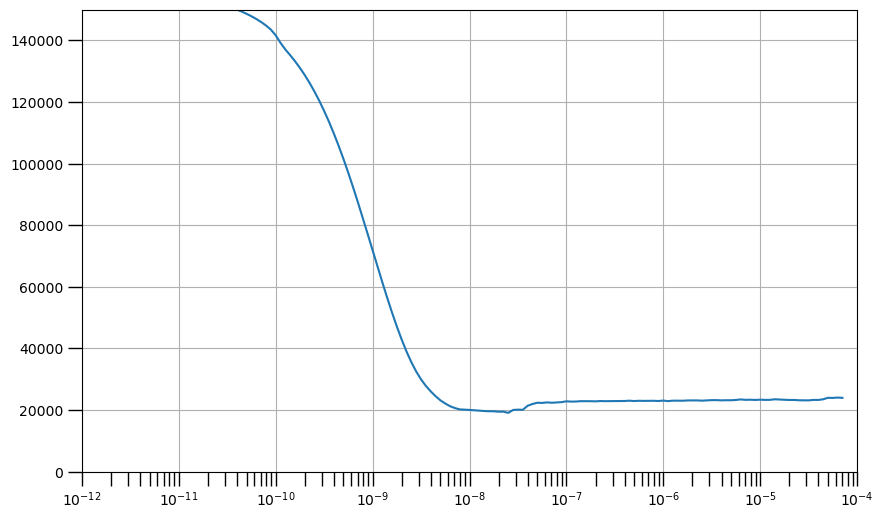

In [19]:
import matplotlib.pyplot as plt
# Define the learning rate array
lrs = 1e-12 * (10 ** (np.arange(160) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-12, 1e-4, 0, 150000])

In [31]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the learning rate based on the graph
learning_rate = 3e-9

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0)


# Set the training parameters
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=optimizer,
              metrics=["mae"])

# loss=tf.keras.losses.Huber()

# Train the model
history = model.fit(X_train, y_train,epochs=500)

Epoch 1/500
163/163 [==============================] - 7s 8ms/step - loss: 154782.5625 - mae: 362.9784
Epoch 2/500
163/163 [==============================] - 1s 8ms/step - loss: 116608.7969 - mae: 306.0483
Epoch 3/500
163/163 [==============================] - 1s 9ms/step - loss: 91449.7500 - mae: 261.7953
Epoch 4/500
163/163 [==============================] - 1s 8ms/step - loss: 73885.2188 - mae: 225.7070
Epoch 5/500
163/163 [==============================] - 1s 8ms/step - loss: 61155.6953 - mae: 195.8476
Epoch 6/500
163/163 [==============================] - 1s 8ms/step - loss: 51708.6055 - mae: 173.1098
Epoch 7/500
163/163 [==============================] - 1s 8ms/step - loss: 44602.1758 - mae: 158.1820
Epoch 8/500
163/163 [==============================] - 1s 8ms/step - loss: 39234.4023 - mae: 147.9654
Epoch 9/500
163/163 [==============================] - 1s 8ms/step - loss: 35175.5000 - mae: 140.0967
Epoch 10/500
163/163 [==============================] - 1s 8ms/step - loss: 3210

163/163 [==============================] - 1s 8ms/step - loss: 12448.2129 - mae: 79.5122
Epoch 82/500
163/163 [==============================] - 1s 8ms/step - loss: 12261.9785 - mae: 78.8989
Epoch 83/500
163/163 [==============================] - 1s 9ms/step - loss: 12119.6582 - mae: 78.5898
Epoch 84/500
163/163 [==============================] - 1s 8ms/step - loss: 11890.5459 - mae: 77.5353
Epoch 85/500
163/163 [==============================] - 1s 8ms/step - loss: 11714.8232 - mae: 77.0749
Epoch 86/500
163/163 [==============================] - 1s 8ms/step - loss: 11513.3975 - mae: 76.1810
Epoch 87/500
163/163 [==============================] - 1s 8ms/step - loss: 11374.2441 - mae: 75.8665
Epoch 88/500
163/163 [==============================] - 1s 8ms/step - loss: 11225.9297 - mae: 75.4103
Epoch 89/500
163/163 [==============================] - 1s 8ms/step - loss: 10997.1738 - mae: 74.5245
Epoch 90/500
163/163 [==============================] - 1s 8ms/step - loss: 10843.5000 - mae: 7

163/163 [==============================] - 1s 8ms/step - loss: 4431.8960 - mae: 49.8645
Epoch 162/500
163/163 [==============================] - 1s 8ms/step - loss: 4471.0420 - mae: 50.0890
Epoch 163/500
163/163 [==============================] - 1s 9ms/step - loss: 4667.1621 - mae: 53.4849
Epoch 164/500
163/163 [==============================] - 1s 9ms/step - loss: 4410.7852 - mae: 50.4419
Epoch 165/500
163/163 [==============================] - 1s 9ms/step - loss: 4504.5815 - mae: 51.8719
Epoch 166/500
163/163 [==============================] - 1s 9ms/step - loss: 4282.3062 - mae: 49.4325
Epoch 167/500
163/163 [==============================] - 1s 8ms/step - loss: 4015.5547 - mae: 47.8287
Epoch 168/500
163/163 [==============================] - 1s 8ms/step - loss: 3878.9985 - mae: 46.5344
Epoch 169/500
163/163 [==============================] - 1s 8ms/step - loss: 3892.5469 - mae: 46.2034
Epoch 170/500
163/163 [==============================] - 1s 8ms/step - loss: 3823.1965 - mae: 46

163/163 [==============================] - 1s 9ms/step - loss: 1977.2411 - mae: 33.0395
Epoch 242/500
163/163 [==============================] - 1s 9ms/step - loss: 1839.9039 - mae: 32.8099
Epoch 243/500
163/163 [==============================] - 1s 9ms/step - loss: 2033.5802 - mae: 32.9256
Epoch 244/500
163/163 [==============================] - 2s 10ms/step - loss: 2093.7856 - mae: 32.5419
Epoch 245/500
163/163 [==============================] - 1s 9ms/step - loss: 2032.6716 - mae: 33.0340
Epoch 246/500
163/163 [==============================] - 1s 9ms/step - loss: 1860.8369 - mae: 31.3321
Epoch 247/500
163/163 [==============================] - 1s 9ms/step - loss: 1720.4100 - mae: 30.1619
Epoch 248/500
163/163 [==============================] - 2s 11ms/step - loss: 2022.3090 - mae: 33.7041
Epoch 249/500
163/163 [==============================] - 2s 9ms/step - loss: 1580.6722 - mae: 29.4711
Epoch 250/500
163/163 [==============================] - 1s 9ms/step - loss: 2015.3499 - mae: 

163/163 [==============================] - 1s 9ms/step - loss: 1509.4191 - mae: 26.4882
Epoch 322/500
163/163 [==============================] - 1s 8ms/step - loss: 833.0499 - mae: 20.0737
Epoch 323/500
163/163 [==============================] - 1s 8ms/step - loss: 1299.1957 - mae: 24.2347
Epoch 324/500
163/163 [==============================] - 1s 8ms/step - loss: 869.9180 - mae: 20.6583
Epoch 325/500
163/163 [==============================] - 1s 8ms/step - loss: 1249.7102 - mae: 24.7500
Epoch 326/500
163/163 [==============================] - 1s 8ms/step - loss: 871.4778 - mae: 20.9409
Epoch 327/500
163/163 [==============================] - 1s 8ms/step - loss: 796.3701 - mae: 20.4129
Epoch 328/500
163/163 [==============================] - 1s 9ms/step - loss: 814.9084 - mae: 20.8297
Epoch 329/500
163/163 [==============================] - 1s 9ms/step - loss: 989.6030 - mae: 22.7724
Epoch 330/500
163/163 [==============================] - 1s 9ms/step - loss: 955.4235 - mae: 21.2166
E

163/163 [==============================] - 1s 8ms/step - loss: 626.9450 - mae: 17.9096
Epoch 403/500
163/163 [==============================] - 1s 8ms/step - loss: 660.1227 - mae: 18.4964
Epoch 404/500
163/163 [==============================] - 1s 8ms/step - loss: 567.3149 - mae: 17.0835
Epoch 405/500
163/163 [==============================] - 1s 8ms/step - loss: 656.0686 - mae: 18.0713
Epoch 406/500
163/163 [==============================] - 1s 8ms/step - loss: 789.3726 - mae: 20.0820
Epoch 407/500
163/163 [==============================] - 1s 8ms/step - loss: 595.0128 - mae: 17.1193
Epoch 408/500
163/163 [==============================] - 1s 8ms/step - loss: 770.7634 - mae: 20.2509
Epoch 409/500
163/163 [==============================] - 1s 9ms/step - loss: 526.8038 - mae: 16.2662
Epoch 410/500
163/163 [==============================] - 1s 9ms/step - loss: 674.1489 - mae: 18.7710
Epoch 411/500
163/163 [==============================] - 1s 9ms/step - loss: 690.5323 - mae: 19.3699
Epoc

163/163 [==============================] - 1s 9ms/step - loss: 537.3405 - mae: 16.3572
Epoch 484/500
163/163 [==============================] - 1s 9ms/step - loss: 560.7228 - mae: 16.4920
Epoch 485/500
163/163 [==============================] - 1s 9ms/step - loss: 504.3756 - mae: 16.3140
Epoch 486/500
163/163 [==============================] - 1s 9ms/step - loss: 703.9421 - mae: 18.7714
Epoch 487/500
163/163 [==============================] - 1s 9ms/step - loss: 455.6946 - mae: 14.6300
Epoch 488/500
163/163 [==============================] - 1s 9ms/step - loss: 1026.0406 - mae: 19.1386
Epoch 489/500
163/163 [==============================] - 1s 9ms/step - loss: 873.5161 - mae: 18.9315
Epoch 490/500
163/163 [==============================] - 1s 9ms/step - loss: 483.4596 - mae: 15.4868
Epoch 491/500
163/163 [==============================] - 1s 9ms/step - loss: 498.1167 - mae: 15.6521
Epoch 492/500
163/163 [==============================] - 1s 9ms/step - loss: 532.6613 - mae: 16.2055
Epo

In [32]:
model.predict(X_test), y_test

19/19 [==============================] - 1s 3ms/step


(array([[659.52594],
        [651.95667],
        [647.43976],
        [649.77124],
        [651.05536],
        [656.0668 ],
        [658.83295],
        [658.96924],
        [663.6763 ],
        [667.37006],
        [668.419  ],
        [671.15533],
        [672.9163 ],
        [673.2373 ],
        [671.0385 ],
        [669.1561 ],
        [668.4936 ],
        [662.4269 ],
        [659.86127],
        [658.05304],
        [657.0519 ],
        [658.0762 ],
        [657.0409 ],
        [652.87634],
        [657.17303],
        [662.26404],
        [669.0769 ],
        [674.61975],
        [676.49194],
        [673.40173],
        [671.2074 ],
        [665.5453 ],
        [658.6383 ],
        [657.6373 ],
        [658.0915 ],
        [659.8092 ],
        [642.3687 ],
        [623.3942 ],
        [607.6309 ],
        [599.3147 ],
        [590.52924],
        [581.05853],
        [566.9376 ],
        [563.3765 ],
        [560.9824 ],
        [559.3744 ],
        [558.86127],
        [555.

In [33]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [34]:
results = model.predict(X_test)
results

19/19 [==============================] - 0s 2ms/step


array([[659.52594],
       [651.95667],
       [647.43976],
       [649.77124],
       [651.05536],
       [656.0668 ],
       [658.83295],
       [658.96924],
       [663.6763 ],
       [667.37006],
       [668.419  ],
       [671.15533],
       [672.9163 ],
       [673.2373 ],
       [671.0385 ],
       [669.1561 ],
       [668.4936 ],
       [662.4269 ],
       [659.86127],
       [658.05304],
       [657.0519 ],
       [658.0762 ],
       [657.0409 ],
       [652.87634],
       [657.17303],
       [662.26404],
       [669.0769 ],
       [674.61975],
       [676.49194],
       [673.40173],
       [671.2074 ],
       [665.5453 ],
       [658.6383 ],
       [657.6373 ],
       [658.0915 ],
       [659.8092 ],
       [642.3687 ],
       [623.3942 ],
       [607.6309 ],
       [599.3147 ],
       [590.52924],
       [581.05853],
       [566.9376 ],
       [563.3765 ],
       [560.9824 ],
       [559.3744 ],
       [558.86127],
       [555.6541 ],
       [556.0968 ],
       [556.2543 ],


In [35]:
results = results[:,0]

In [36]:
y_test = y_test.to_numpy()
# y_test = y_test[:,0]

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [37]:
time_valid = corn_df['date'][int(len(y)*train_pct)+window_size:]

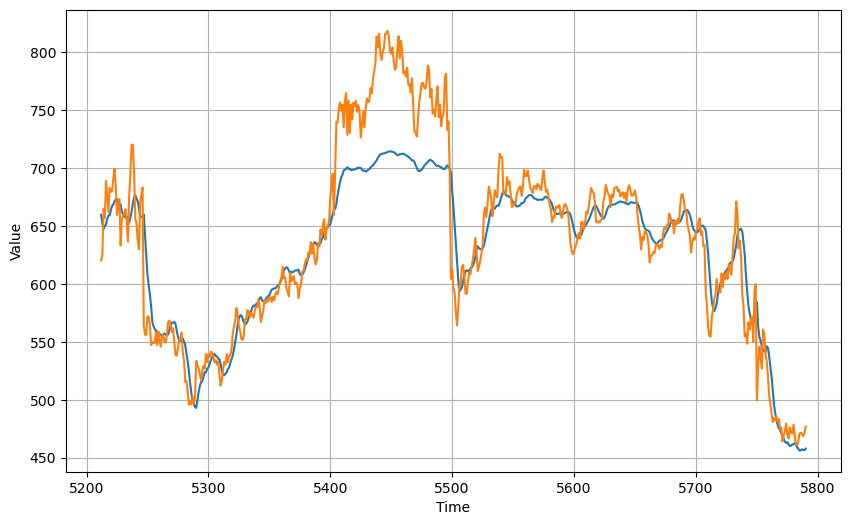

In [38]:
# Plot the results
plot_series(time_valid.index, (results, y_test))

In [39]:
# Compute the MSE and MAE
print(tf.keras.metrics.mean_squared_error(y_test, results).numpy())
print(tf.keras.metrics.mean_absolute_error(y_test, results).numpy())

1069.7094
21.864773


In [40]:
train_results = model.predict(X_train)
train_results = train_results[:,0]

y_train = y_train.to_numpy()
# y_train = y_train[:,0]


163/163 [==============================] - 0s 3ms/step


AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [41]:
print(tf.keras.metrics.mean_squared_error(y_train, train_results).numpy())
print(tf.keras.metrics.mean_absolute_error(y_train, train_results).numpy())
# mse much higher here than the linear regression model

335.2348
11.806092
